# Agrupamento de dados / algoritmo k-means

O <code>*K*-Means</code> é um algoritmo de aprendizado de máquina não supervisionado. Em contraste com os algoritmos tradicionais de aprendizado de máquina supervisionado, o <code>*K*-Means</code> tenta classificar dados sem antes ter sido treinado com dados rotulados. Depois que o algoritmo é executado e os grupos são definidos, qualquer novo dado pode ser facilmente atribuído ao grupo mais relevante.

Ele procura um número predeterminado de clusters em um conjunto de dados multidimensionais não rotulados.
Isso é feito usando uma concepção simples da aparência do cluster ideal:

- O "centro do cluster", também chamado de centróide, é a média aritmética de todos os pontos pertencentes ao cluster.
- Cada ponto está mais próximo de seu próprio centróide do que de outros centros de cluster.

Essas duas suposições são a base do modelo *k*-means.

<!--  

TODO: Explicação de como funciona o algoritmo 

-->

## Bibliotecas usadas no código

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale, LabelEncoder
import sklearn.metrics as sm
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from scipy.stats import mode
%matplotlib inline
plt.rcParams['figure.figsize'] = 7, 4

## Utilizando o dataset



In [277]:
iris = pd.read_csv("https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv")
iris.rename(columns={'sepal_length':'Comprimento da sépala',
                     'sepal_width':'Altura da sépala',
                     'petal_length':'Comprimento da pétala',
                     'petal_width':'Altura da pétala',
                     'species':'Espécie'}, 
                 inplace=True)
le = preprocessing.LabelEncoder()
le.fit(iris['Espécie'])
LabelEncoder()
iris['t_Espécie'] = le.transform(iris['Espécie'])
print(iris['t_Espécie'])

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: t_Espécie, Length: 150, dtype: int64


## Plot de alguns atributos em pares.

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


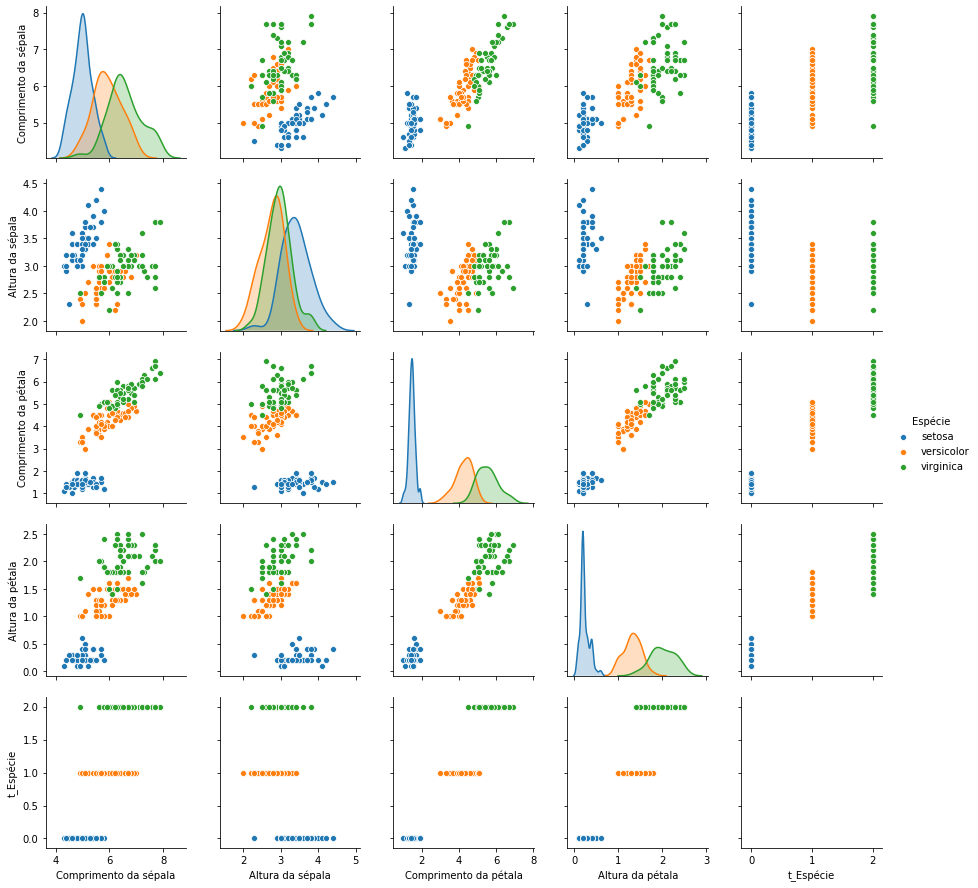

In [279]:
sns.pairplot(iris,hue='Espécie')

In [217]:
features = iris.iloc[:, 0:4].values #Armazena tudo menos a espécie / Equivalente a iris.data do dataset do sklearn
features[0:10,:] 

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

## Construindo e rodando o modelo

     K-classes
0            1
1            1
2            1
3            1
4            1
..         ...
145          2
146          0
147          2
148          2
149          0

[150 rows x 1 columns]


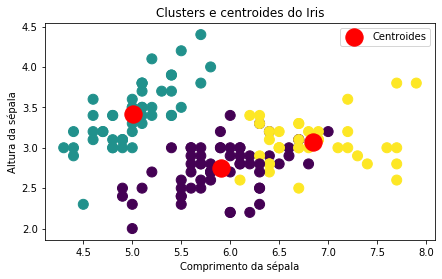

In [292]:
kmeans = KMeans(n_clusters = 3,random_state=5).fit(features)
iris['K-classes'] = kmeans.labels_

print(Y)
plt.scatter(features[:, 0], features[:,1], s = 100, c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'red',label = 'Centroides')
plt.title('Clusters e centroides do Iris')
plt.xlabel('Comprimento da sépala')
plt.ylabel('Altura da sépala')
plt.legend()
plt.show()


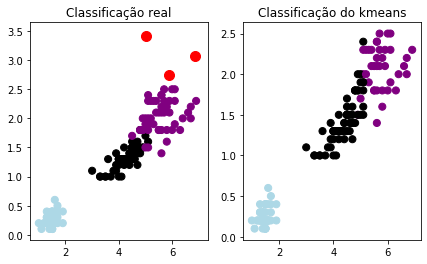

In [291]:
iris_df = iris.drop(columns="Espécie")

cores = np.array(['black','lightblue','purple'])
cores2 = np.array(['lightblue','black','purple'])

plt.subplot(1,2,1)
plt.scatter(x=iris_df['Comprimento da pétala'],y=iris_df['Altura da pétala'], c=cores2[iris['t_Espécie']], s=50)
plt.title('Classificação real')
plt.scatter(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], s = 100, c = 'red',label = 'Centroides')

plt.subplot(1,2,2)
plt.scatter(x=iris_df['Comprimento da pétala'],y=iris_df['Altura da pétala'], c=cores[kmeans.labels_], s=50)
plt.title('Classificação do kmeans')

plt.show()

In [0]:
relabel = np.choose(kmeans.labels_,[2,0,1]).astype(np.int64) # Conseguimos extrair um vetor de escolhas de um vetor multidimensional
huecolor = np.choose(kmeans.labels_,[1,0,2]).astype(np.int64)

plt.subplot(1,2,1)
plt.scatter(x=iris_df['Comprimento da pétala'],y=iris_df['Altura da pétala'], c=cores[iris['K-classes']], s=50)
plt.title('Classificação real')


plt.subplot(1,2,2)
plt.scatter(x=iris_df['Comprimento da pétala'],y=iris_df['Altura da pétala'], c=cores[kmeans.labels_], s=50)
plt.title('Classificação do kmeans')

plt.show()

print(Y.values.tolist())
print(kmeans.labels_)
print(relabel)

In [0]:
print(classification_report(Y,relabel))

In [0]:
fig, ax = plt.subplots(1,2,figsize=(13,5))
sns.scatterplot(x=iris_df['Comprimento da pétala'],y=iris_df['Altura da pétala'],hue=cores[huecolor], palette=cores, s=50, ax=ax[0])
sns.scatterplot(x=iris_df['Comprimento da pétala'],y=iris_df['Altura da pétala'],hue=cores[iris['K-classes']], palette=cores2, s=50, ax=ax[1])
fig.show()


Text(0.5, 1.0, 'Classificação do Kmeans')

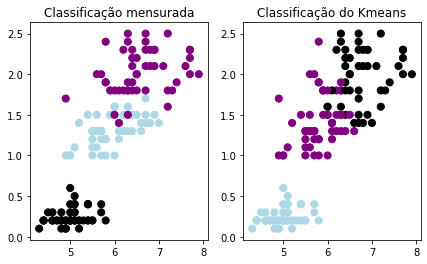

In [236]:
siri = datasets.load_iris()
xscale = scale(siri.data)
y = pd.DataFrame(siri.target)

cluster = KMeans(n_clusters=3, random_state = 5).fit(xscale)

siri_df = pd.DataFrame(siri.data)
siri_df.columns=['Comprimento da sépala','Altura da sépala', 'Comprimento da pétala', 'Altura da pétala']
y.columns = ['Alvos']

cor = np.array(['black','lightblue','purple'])

relabel = np.choose(kmeans.labels_,[2,0,1]).astype(np.int64)
plt.subplot(1,2,1)
plt.scatter(x=siri_df['Comprimento da sépala'], y=siri_df['Altura da pétala'], c=cor[siri.target], s=50)
plt.title('Classificação mensurada')

plt.subplot(1,2,2)
plt.scatter(x=siri_df['Comprimento da sépala'], y=siri_df['Altura da pétala'], c=cor[kmeans.labels_], s=50)
plt.title('Classificação do Kmeans')

In [0]:
print(classification_report(y,relabel))

In [0]:
confusion_matrix(y,kmeans.labels_)

### Exemplo 2: dígitos no kmeans

Veremos agora uma aplicação do *k*-means em um dataset de dígitos. Aqui, iremos aplicar o *k*-means para tentar identificar dígitos semelhantes sem usar a informação dos rótulos iniciais.

Nós iremos começar carregando os digitos e encontrando os centróides dos clusters. Esses digitos consistem em mais ou menos 1800 amostrar com 64 características(``features``), sendo que essas 64 características seriam o brilho de um pixel em uma imagem 8x8

In [0]:
digits = load_digits()
digits.data.shape

## Clustering

In [0]:
kmeans_digitos = KMeans(n_clusters=10, random_state=0)
clusters = kmeans_digitos.fit_predict(digits.data)
kmeans_digitos.cluster_centers_.shape

O resultado são 10 clusters em 64 dimensões.

Observe que os próprios centros do cluster são pontos tridimensionais e podem ser interpretados como o dígito "característico" dentro do cluster.


In [0]:
figura, axisx = plt.subplots(2, 5, figsize=(10, 3))
centers = kmeans_digitos.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(axisx.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

Vemos que mesmo sem os rótulos, o `` KMeans`` é capaz de encontrar clusters cujos centros são dígitos reconhecíveis, talvez a exceção do 1 e 8.

In [0]:
labels = np.zeros_like(clusters) # Cria um arranjo com o mesmo formato do arranjo dado, mas composto apenas de zeros

for i in range(10):    
    mask = (clusters == i)    
    labels[mask] = mode(digits.target[mask])[0]

In [0]:
print(classification_report(digits.target,labels))

In [0]:
mat = confusion_matrix(digits.target, labels)

_,axx = plt.subplots(figsize=(10,5)) 

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names,ax=axx)

plt.xlabel('Características verdadeiras')
plt.ylabel('Características preditas');
plt.show()

print('\n'*3)
print(confusion_matrix(digits.target,labels))
